* Allyson Meyer
* Final Project: How has the economy affected fertility rates in the US

# DSC530 Final Project

### Importing the Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read in necessary datasets
# salary, population and fertility rates, CPI, and housing
# data has been pulled from Bureau of Labor Statistics, census.gov, US Bureau of Statistics, and Federal Reserve Bank of St. Louis
df1 = pd.read_csv("/Users/smooshii/DSC530/salary.csv")
df2 = pd.read_csv("/Users/smooshii/DSC530/population_fertility.csv")
df3 = pd.read_csv("/Users/smooshii/DSC530/cpi.csv")
df4 = pd.read_csv("/Users/smooshii/DSC530/housing.csv")

In [5]:
# change annual salary type to int and drop Margin of Error column
df1['Annual_Salary'] = df1['Annual_Salary'].astype(int)
df1 = df1.drop(['Salary_Margin_of_Error'], axis=1)
df1.head()

,Year,Annual_Salary
0,2022,74580
1,2021,70780
2,2020,68010
3,2019,68700
4,2018,63180


In [6]:
# remove commas from Avg_Population and change type to int
df2['Avg_Population'] = df2['Avg_Population'].str.replace(',', '')
df2['Avg_Population'] = df2['Avg_Population'].astype(int)
df2.head()

,Year,Avg_Population,Total_Fertility_Rate
0,1967,197457000,2.578
1,1968,199399000,2.477
2,1969,201385000,2.465
3,1970,203984000,2.480
4,1971,206827000,2.266


In [7]:
# no changes needed with df3
df3.head()

,Year,CPI
0,1967,34.71
1,1968,36.32
2,1969,38.43
3,1970,40.82
4,1971,42.74


In [8]:
# change DATE to datetime and only show year
df4['DATE'] = pd.to_datetime(df4['DATE'])
df4['DATE'] = df4['DATE'].dt.year

# since data is pulled by quarters, sum each year of data and overwrite it to MSPUS
df4 = df4.groupby('DATE')['MSPUS'].sum().reset_index()
# since the sum was done by quarters, divide by 4 to get the average for the year and ensure data type is int
df4['MSPUS'] = df4['MSPUS'] / 4
df4['MSPUS'] = df4['MSPUS'].astype(int)

# rename columns to be better suited for recall
df4 = df4.rename(columns={"MSPUS": "House_Value",
                         "DATE": "Year"})
df4.head()

,Year,House_Value
0,1967,22750
1,1968,24800
2,1969,25600
3,1970,23475
4,1971,25225


In [9]:
# merge all dataframes together
df = df1.merge(df2, how='inner', on='Year')
df = df.merge(df3, how='inner', on='Year')
df = df.merge(df4, how='inner', on='Year')
# round Total_Fertility_Rate to the nearest 2 decimals for easier readability
df['Total_Fertility_Rate'] = round(df['Total_Fertility_Rate'], 2)

# create new dataframe house_ratio which is the average house value for that year and divide by the annual salary
# this is to create a ratio as to how housing prices have changed vs annual salary
house_ratio = df['House_Value'] / df['Annual_Salary']
year = df['Year']
ratio = pd.DataFrame({'Year': year, 'House_Ratio': house_ratio})
# merge dataframe with primary df
df = df.merge(ratio, how='inner', on='Year')
df.head()

,Year,Annual_Salary,Avg_Population,Total_Fertility_Rate,CPI,House_Value,House_Ratio
0,2022,74580,333287557,1.66,294.31,432950,5.805176
1,2021,70780,332031554,1.66,277.25,383000,5.411133
2,2020,68010,331511512,1.64,267.69,328150,4.825026
3,2019,68700,328329953,1.71,263.21,320250,4.661572
4,2018,63180,326838199,1.73,257.57,325275,5.148386


# Histograms

### Annual Salary

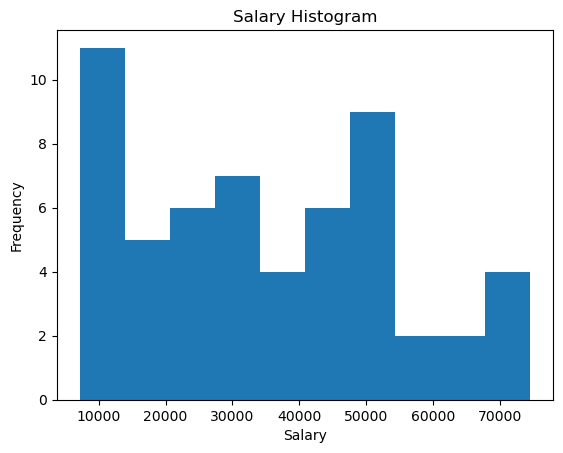

In [12]:
x = df['Annual_Salary']

plt.hist(x)
plt.title("Salary Histogram")
plt.ylabel('Frequency')
plt.xlabel('Salary')
plt.show()

### Population

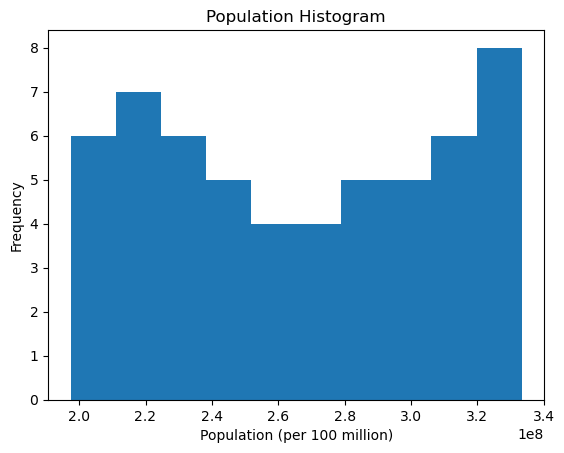

In [14]:
x = df['Avg_Population']

plt.hist(x)
plt.title("Population Histogram")
plt.ylabel('Frequency')
plt.xlabel('Population (per 100 million)')
plt.show()

### Fertility Rates

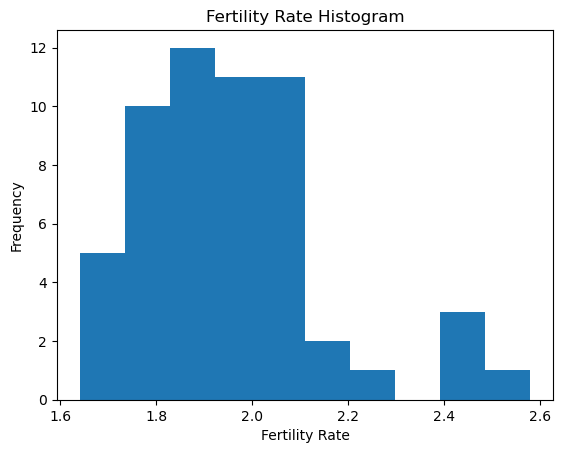

In [16]:
x = df['Total_Fertility_Rate']

plt.hist(x)
plt.title("Fertility Rate Histogram")
plt.ylabel('Frequency')
plt.xlabel('Fertility Rate')
plt.show()

### CPI

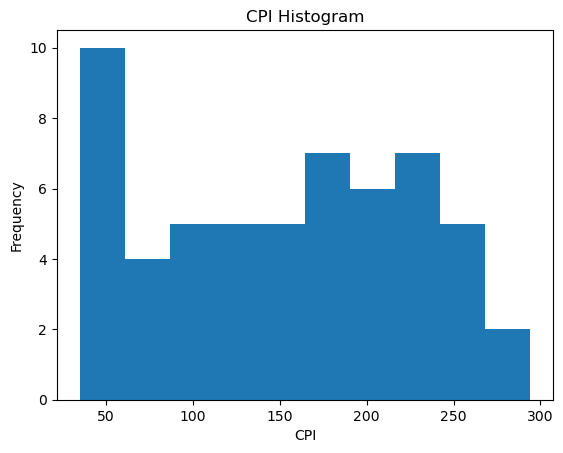

In [18]:
x = df['CPI']

plt.hist(x)
plt.title("CPI Histogram")
plt.ylabel('Frequency')
plt.xlabel('CPI')
plt.show()

### House Value

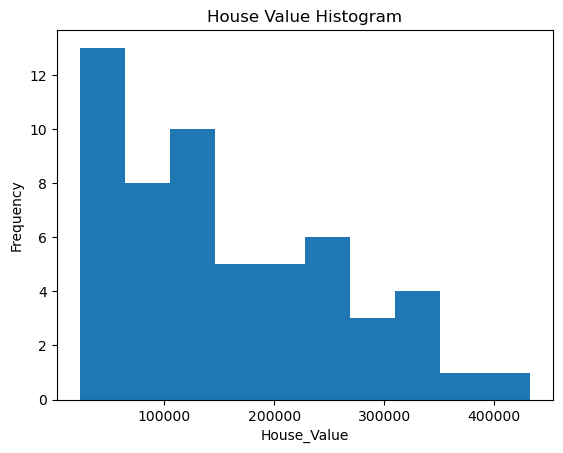

In [20]:
x = df['House_Value']

plt.hist(x)
plt.title("House Value Histogram")
plt.ylabel('Frequency')
plt.xlabel('House_Value')
plt.show()

### House Ratio

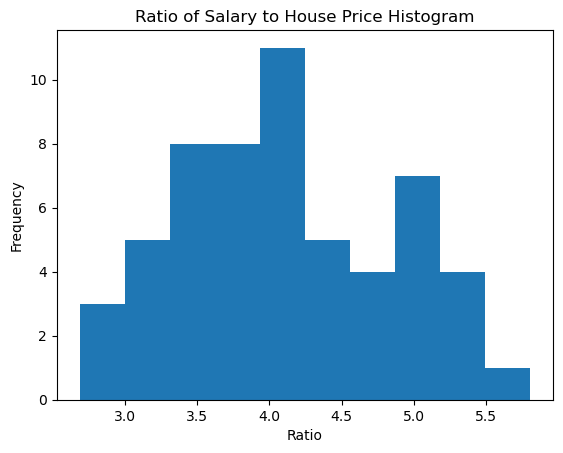

In [22]:
x = df['House_Ratio']

plt.hist(x)
plt.title("Ratio of Salary to House Price Histogram")
plt.ylabel('Frequency')
plt.xlabel('Ratio')
plt.show()

# Descriptive Statistics

### Annual Salary

In [25]:
df['Annual_Salary'].describe()

count       56.000000
mean     34858.107143
std      18870.788338
min       7143.000000
25%      18730.000000
50%      33170.000000
75%      49847.500000
max      74580.000000
Name: Annual_Salary, dtype: float64

In [26]:
df['Annual_Salary'].var()

356106652.4974027

In [27]:
df['Annual_Salary'].tail()

51    9028
52    8734
53    8389
54    7743
55    7143
Name: Annual_Salary, dtype: int64

### Population

In [29]:
df['Avg_Population'].describe()

count    5.600000e+01
mean     2.659165e+08
std      4.278909e+07
min      1.974570e+08
25%      2.289058e+08
50%      2.647020e+08
75%      3.047634e+08
max      3.332876e+08
Name: Avg_Population, dtype: float64

In [30]:
df['Avg_Population'].var()

1830906289077308.8

In [31]:
df['Avg_Population'].tail()

51    206827000
52    203984000
53    201385000
54    199399000
55    197457000
Name: Avg_Population, dtype: int64

### Fertility Rate

In [33]:
df['Total_Fertility_Rate'].describe()

count    56.000000
mean      1.953750
std       0.202875
min       1.640000
25%       1.817500
50%       1.930000
75%       2.050000
max       2.580000
Name: Total_Fertility_Rate, dtype: float64

In [34]:
df['Total_Fertility_Rate'].var()

0.0411584090909091

In [35]:
df['Total_Fertility_Rate'].tail()

51    2.27
52    2.48
53    2.46
54    2.48
55    2.58
Name: Total_Fertility_Rate, dtype: float64

### CPI

In [37]:
df['CPI'].describe()

count     56.000000
mean     152.411964
std       76.103888
min       34.710000
25%       87.125000
50%      158.860000
75%      216.487500
max      294.310000
Name: CPI, dtype: float64

In [38]:
df['CPI'].var()

5791.80177607143

In [39]:
df['CPI'].tail()

51    42.74
52    40.82
53    38.43
54    36.32
55    34.71
Name: CPI, dtype: float64

### House Value

In [41]:
df['House_Value'].describe()

count        56.000000
mean     156339.285714
std      105484.774091
min       22750.000000
25%       67900.000000
50%      131950.000000
75%      231300.000000
max      432950.000000
Name: House_Value, dtype: float64

In [42]:
df['House_Value'].var()

11127037564.935062

In [43]:
df['House_Value'].tail()

51    25225
52    23475
53    25600
54    24800
55    22750
Name: House_Value, dtype: int64

### House Ratio

In [45]:
df['House_Ratio'].describe()

count    56.000000
mean      4.117358
std       0.742807
min       2.687772
25%       3.607024
50%       4.003944
75%       4.693749
max       5.805176
Name: House_Ratio, dtype: float64

In [46]:
df['House_Ratio'].var()

0.5517621561659878

In [47]:
df['House_Ratio'].tail()

51    2.794085
52    2.687772
53    3.051615
54    3.202893
55    3.184936
Name: House_Ratio, dtype: float64

# PMF

In [49]:
# when house ratios are above their mean, do fertility rates drop?
# get mean of house_ratio
df['House_Ratio'].mean()

4.117357655190988

In [50]:
# subset dataframe for house_ratios that are above its mean and below
above_mean = df[df["House_Ratio"] >= 4.117357655190988]
below_mean = df[df["House_Ratio"] <= 4.117357655190988]

In [51]:
import thinkstats2

# create pmf of above_mean and below_mean
above_mean_pmf = thinkstats2.Pmf(above_mean['Total_Fertility_Rate'], label="above mean")
below_mean_pmf = thinkstats2.Pmf(below_mean['Total_Fertility_Rate'], label="below mean")

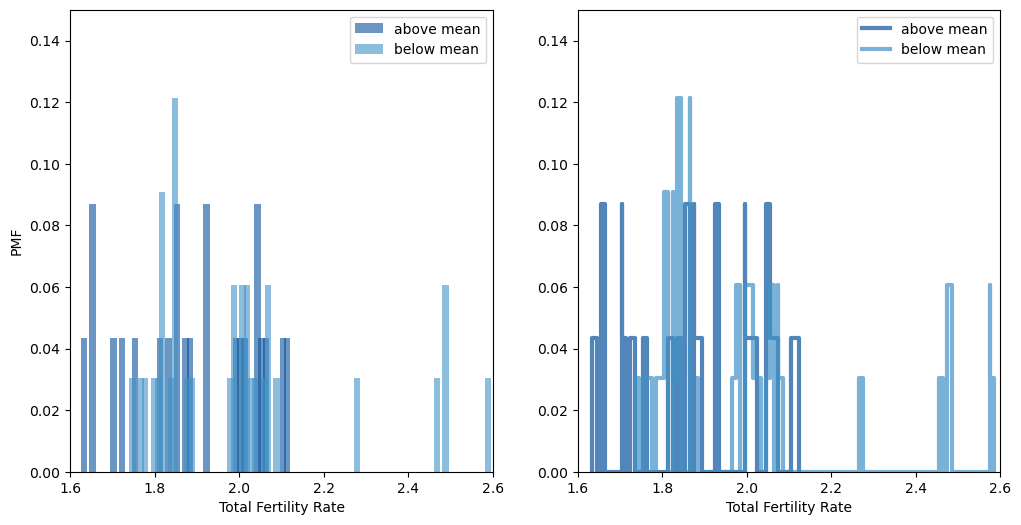

In [52]:
import thinkplot

width = .015
axis = [1.6, 2.6, 0, .15]

# plot PMFs as histogram
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(above_mean_pmf, align="right", width=width)
thinkplot.Hist(below_mean_pmf, align="left", width=width)
thinkplot.Config(xlabel="Total Fertility Rate", ylabel="PMF", axis=axis)

# second visualization for easier readability
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([above_mean_pmf, below_mean_pmf])
thinkplot.Config(xlabel="Total Fertility Rate", axis=axis)

# CDF

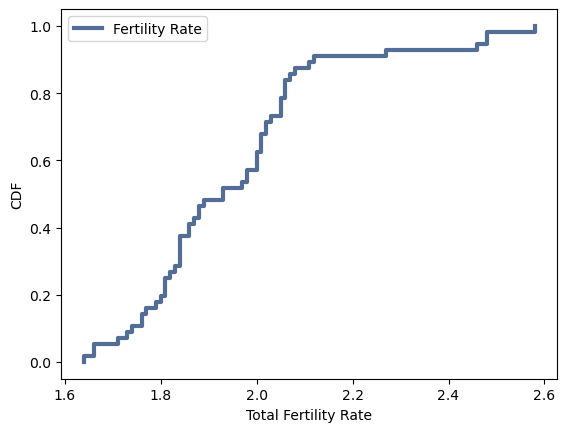

In [54]:
import thinkstats2
import thinkplot

# create CDF off of Total_Fertility_Rate
cdf = thinkstats2.Cdf(df['Total_Fertility_Rate'], label='Fertility Rate')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Total Fertility Rate', ylabel='CDF', loc='upper left')

# Analytical Distribution

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


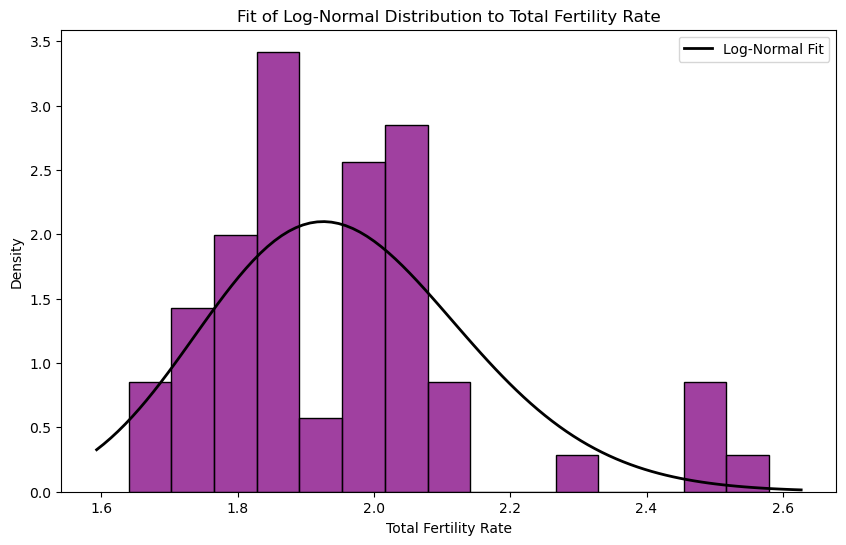

Fitted Log-Normal Parameters:
Shape: 0.0982
Scale (exp(μ)): 1.9441


In [56]:
# log-normal distribution

from scipy.stats import lognorm
import seaborn as sns

# extract Total_Fertility_Rate column
total_fertility_rate = df['Total_Fertility_Rate']

# fit log-normal distribution to the data
shape, loc, scale = lognorm.fit(total_fertility_rate, floc=0)

# plot the histogram of the data
plt.figure(figsize=(10, 6))
sns.histplot(total_fertility_rate, kde=False, color='purple', bins=15, stat='density')

# plot the PDF of fitted log-normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, p, 'k', linewidth=2, label=f'Log-Normal Fit')
plt.xlabel('Total Fertility Rate')
plt.ylabel('Density')
plt.title('Fit of Log-Normal Distribution to Total Fertility Rate')
plt.legend()
plt.show()

# display the fitted parameters
print(f'Fitted Log-Normal Parameters:\nShape: {shape:.4f}\nScale (exp(μ)): {scale:.4f}')

# Scatter Plots

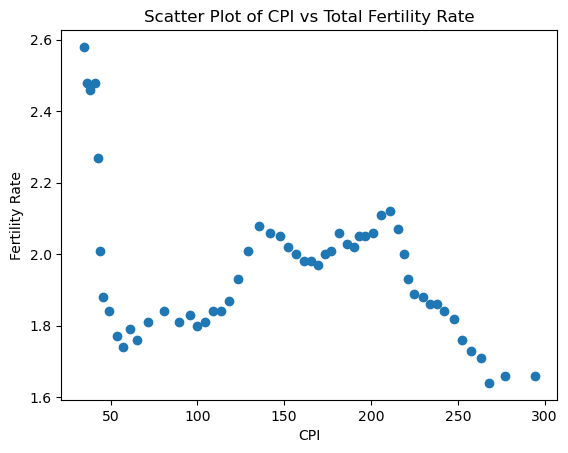

In [58]:
# cpi vs fertility rate
plt.scatter(df['CPI'], df['Total_Fertility_Rate'])
plt.xlabel('CPI')
plt.ylabel('Fertility Rate')
plt.title('Scatter Plot of CPI vs Total Fertility Rate')
plt.show()

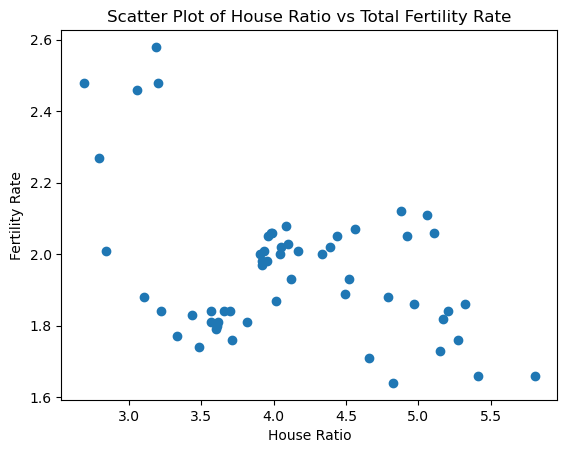

In [59]:
# house value vs fertility rate
plt.scatter(df['House_Ratio'], df['Total_Fertility_Rate'])
plt.xlabel('House Ratio')
plt.ylabel('Fertility Rate')
plt.title('Scatter Plot of House Ratio vs Total Fertility Rate')
plt.show()

# Hypothesis Test

In [61]:
# use correlation as hypothesis test
df.corr(method='pearson')

,Year,Annual_Salary,Avg_Population,Total_Fertility_Rate,CPI,House_Value,House_Ratio
Year,1.000000,0.992850,0.998460,-0.418581,0.997618,0.973166,0.935703
Annual_Salary,0.992850,1.000000,0.989970,-0.405738,0.993396,0.987238,0.930918
Avg_Population,0.998460,0.989970,1.000000,-0.392351,0.995262,0.970491,0.930416
Total_Fertility_Rate,-0.418581,-0.405738,-0.392351,1.000000,-0.382865,-0.406857,-0.415507
CPI,0.997618,0.993396,0.995262,-0.382865,1.000000,0.971899,0.931188
House_Value,0.973166,0.987238,0.970491,-0.406857,0.971899,1.000000,0.952471
House_Ratio,0.935703,0.930918,0.930416,-0.415507,0.931188,0.952471,1.000000


# Regression Analysis

Mean Squared Error (MSE): 0.0033663609993836896
R-squared (R²): 0.9229408517476193


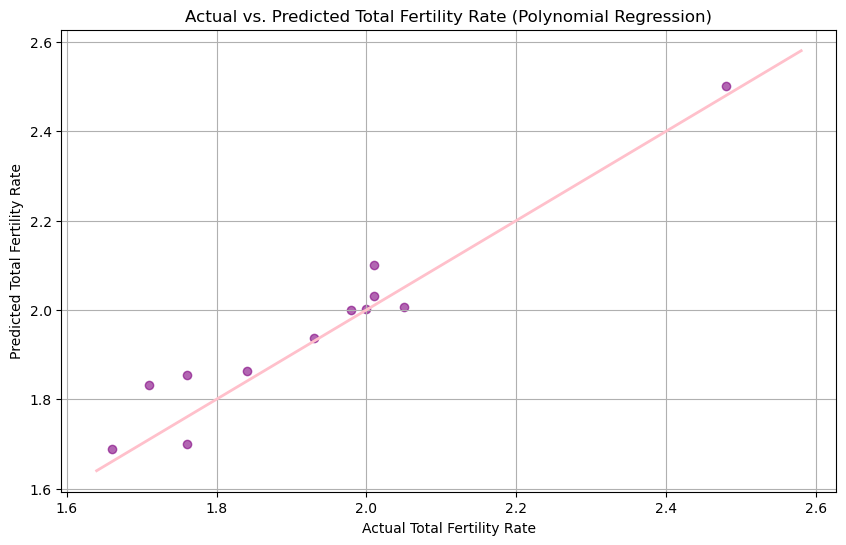

In [64]:
# polynomial regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# define data
X = df[['Year', 'Annual_Salary', 'Avg_Population', 'CPI', 'House_Value', 'House_Ratio']]
y = df['Total_Fertility_Rate']

# create polynomial features with degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

# split the polynomial features into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

# create and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predict the target variable for the test set
y_pred_poly = poly_model.predict(X_test_poly)

# evaluate the polynomial model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error (MSE): {mse_poly}')
print(f'R-squared (R²): {r2_poly}')

# plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='Purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='pink', lw=2)  # Diagonal line (perfect prediction)
plt.xlabel('Actual Total Fertility Rate')
plt.ylabel('Predicted Total Fertility Rate')
plt.title('Actual vs. Predicted Total Fertility Rate (Polynomial Regression)')
plt.grid(True)
plt.show()